In [17]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

In [18]:
df = pd.read_html('https://fbref.com/en/comps/10/Championship-Stats', attrs = {"id" : "results2023-2024101_overall"})[0]

In [19]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Leeds United,38,25,7,6,70,28,42,82,2.16,67.2,31.4,35.8,0.94,W D W W W,35838,Crysencio Summerville - 15,Illan Meslier,NaN
1,2,Leicester City,37,26,4,7,74,33,41,82,2.22,67.5,35.1,32.4,0.88,L L L W D,31053,Jamie Vardy - 13,Mads Hermansen,NaN
2,3,Ipswich Town,38,24,9,5,80,49,31,81,2.13,63.5,39.3,24.3,0.64,W W W L W,28825,"Conor Chaplin, Nathan Broadhead - 12",Václav Hladký,NaN
3,4,Southampton,36,22,7,7,73,47,26,73,2.03,64.3,37.6,26.6,0.74,W L L W W,29333,Adam Armstrong - 18,Gavin Bazunu,NaN
4,5,West Brom,38,19,9,10,59,36,23,66,1.74,46.3,39.5,6.8,0.18,D W D W W,23956,Brandon Thomas-Asante - 9,Alex Palmer,NaN


In [20]:
df.rename(columns={'Rk': 'Pos'}, inplace=True)

In [21]:
df['badge'] = df['Squad'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")

In [22]:
df['GD-xGD'] = df['GD'] - df['xGD']
df['GD-xGD'] = df['GD-xGD'].round(1)

In [23]:
df['badge'][0]

'C:/Users/George/Documents/Football Analytics/Team Logos/leeds united_logo.png'

In [24]:
df.columns

Index(['Pos', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes', 'badge', 'GD-xGD'],
      dtype='object')

In [31]:
df = df[[
    'Pos', 'badge','Squad', 'MP','GF', 'GA', 'GD',
    'xG', 'xGA', 'xGD','GD-xGD'
]]

In [53]:
# Background colour
bg_colour = "#FFFFFF"
text_colour = "#000000"
row_colors = {
    "top2": "#74DC3C",
    "top6": "#B6FB96",
    "relegation": "#F9C6C6",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}
plt.rcParams["text.color"] = text_colour
plt.rcParams["font.family"] = "monospace"

In [27]:
df.columns

Index(['Pos', 'badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       'Pts/MP', 'xG', 'xGA', 'xGD', 'GD-xGD'],
      dtype='object')

In [60]:
import numpy as np
col_defs = [
    ColumnDefinition(
        name="Pos",
        textprops={"ha" : "center"},
        width=0.15,
    ),
    ColumnDefinition(
        name="badge",
        textprops={"ha" : "center", "va" : "center", "color" : bg_colour},
        width=0.3,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Squad",
        textprops={"ha" : "left", "weight" : "bold"},
        width=1,
    ),
    ColumnDefinition(
        name="MP",
        textprops={"ha" : "center"},
        width=0.3,
    ),
    ColumnDefinition(
        name="GF",
        group="Goals",
        textprops={"ha" : "center"},
        width=0.3,
    ),
    ColumnDefinition(
        name="GA",
        group="Goals",
        textprops={"ha" : "center"},
        width=0.3,
    ),
    ColumnDefinition(
        name="GD",
        group="Goals",
        textprops={"ha" : "center", "color" : text_colour, "weight" : "bold"},
        width=0.3,
    ),
    ColumnDefinition(
        name="xG",
        group="Expected Goals",
        width=0.3,
        textprops={"ha" : "center"},# "color" : text_colour, "weight" : "bold"},# "bbox" : {"boxstyle" : "circle", "pad" : 0.2}},
        #cmap=normed_cmap(df["xG"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    ),
    ColumnDefinition(
        name="xGA",
        group="Expected Goals",
        width=0.3,
        textprops={"ha" : "center"},# "color" : text_colour, "weight" : "bold"},# "bbox" : {"boxstyle" : "circle", "pad" : 0.2}},
        #cmap=normed_cmap(df["xGA"], cmap=matplotlib.cm.RdYlGn_r, num_stds=2)
    ),
    ColumnDefinition(
        name="xGD",
        group="Expected Goals",
        width=0.3,
        textprops={"ha" : "center", "color" : text_colour, "weight" : "bold"},# "bbox" : {"boxstyle" : "circle", "pad" : 0.2}},
        #cmap=normed_cmap(df["xGD"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    ),
    ColumnDefinition(
        name="GD-xGD",
        group="Expected Goals",
        width=0.3,
        textprops={"ha" : "center", "color" : text_colour, "weight" : "bold", "bbox" : {"boxstyle" : "circle", "pad" : 0.15}},
        cmap=normed_cmap(df["GD-xGD"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    )
]

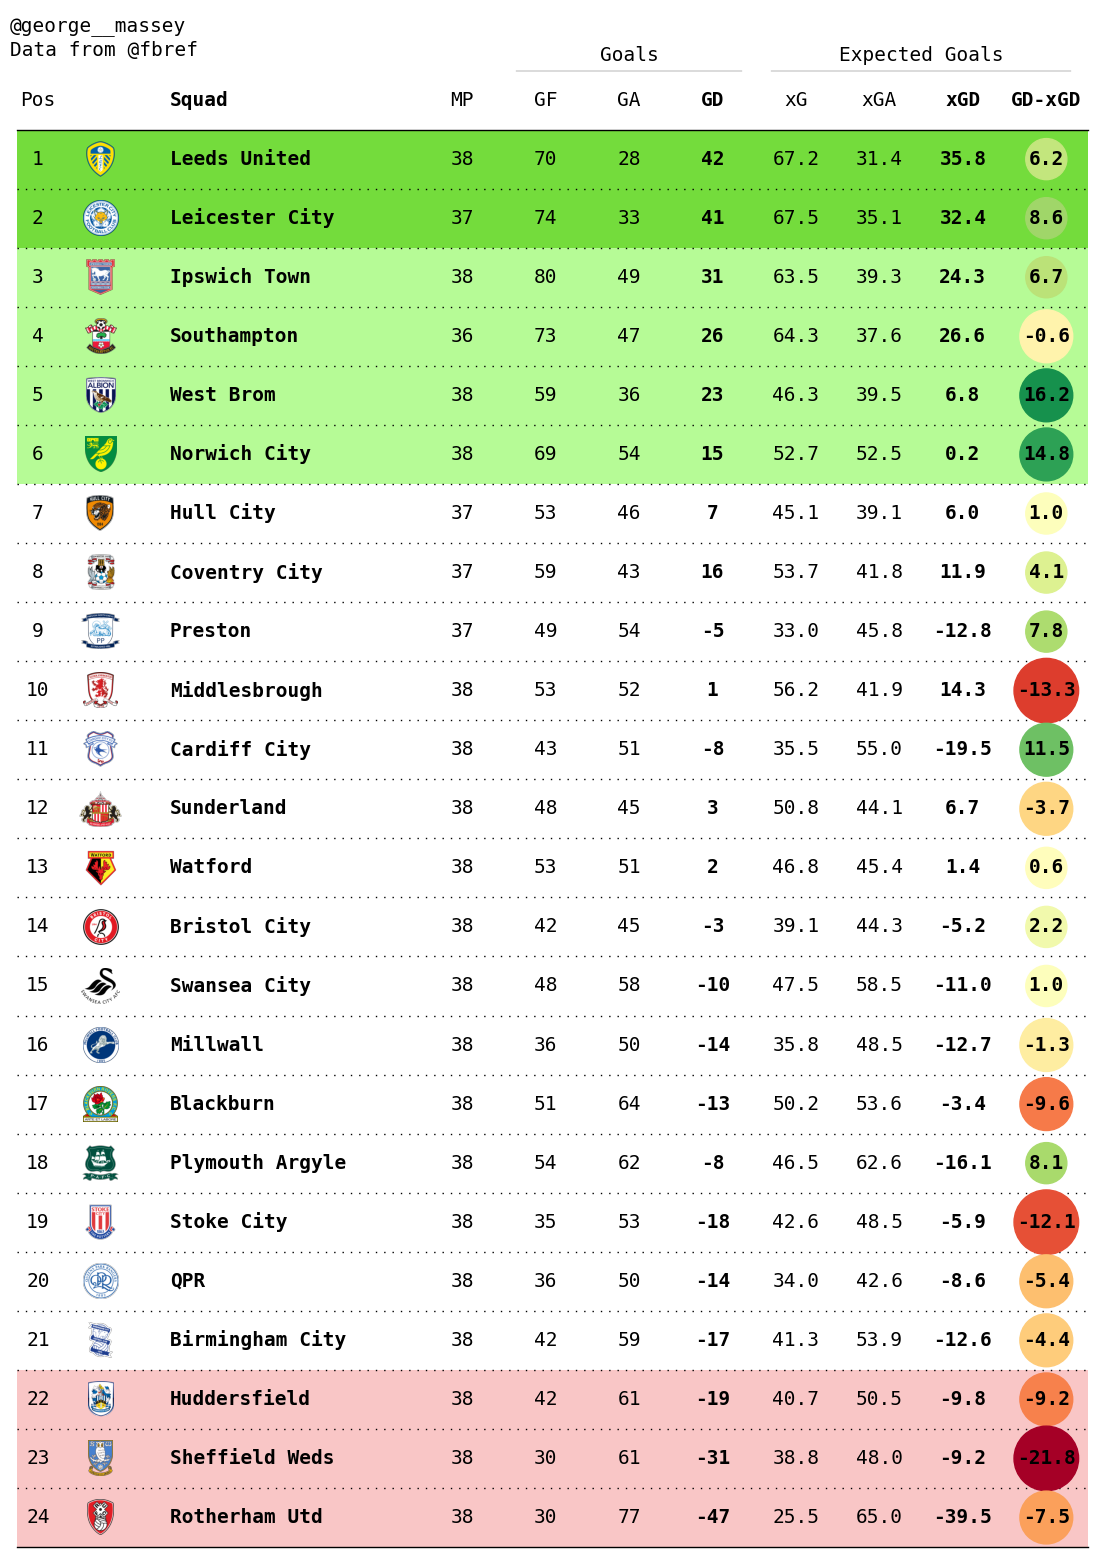

In [75]:
fig, ax = plt.subplots(figsize=(14, 20))
fig.set_facecolor(bg_colour)
ax.set_facecolor(bg_colour)

# Add your name in the top left corner
ax.text(0, 0.995, "@george__massey", fontsize=14, transform=ax.transAxes, ha='left', va='top')
ax.text(0, 0.98, "Data from @fbref", fontsize=14, transform=ax.transAxes, ha='left', va='top')
table = Table(
    df,
    column_definitions=col_defs,
    index_col="Pos",
    row_dividers=True,
    row_divider_kw={"linewidth" : 1, "linestyle" : (0, (1,5))},
    footer_divider=True,
    textprops={"fontsize" : 14},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"])

for idx in [0,1]:
    table.rows[idx].set_facecolor(row_colors["top2"])

for idx in range(2,6):
    table.rows[idx].set_facecolor(row_colors["top6"])

for idx in range(21,24):
    table.rows[idx].set_facecolor(row_colors["relegation"])


In [69]:
fig.savefig(
    "C:/Users/George/Documents/Football Analytics/Visuals/xG-xGD_Championship_Table.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight"
)